In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Bitcoin Energy Consumption Index

In [2]:
BECI = pd.read_csv('data/BECI_TWh.csv')
BECI['Date'] = pd.to_datetime(BECI['Date'])
BECI = BECI.set_index('Date')
BECI_avg = BECI.groupby(pd.Grouper(freq='M')).mean()
BECI_avg = BECI_avg.rename(columns={'Estimated TWh per Year': 'BECI estimation', 'Minimum TWh per Year': 'BECI minimum'})

In [3]:
CBECI = pd.read_csv('data/CBECI.csv')
CBECI = CBECI.rename(columns={'Date and Time': 'Date', 'MAX': 'CBECI maximum', 'MIN': 'CBECI minimum', 'GUESS': 'CBECI estimation'})
CBECI['Date'] = pd.to_datetime(CBECI['Date'])
CBECI = CBECI.set_index('Date')
CBECI = CBECI.drop(columns=['Timestamp'])
CBECI_avg = CBECI.groupby(pd.Grouper(freq='M')).mean()
CBECI_avg

,CBECI maximum,CBECI minimum,CBECI estimation
Date,,,
2014-12-31,2.304681,1.379876,1.807731
2015-01-31,2.472783,1.388412,1.889424
2015-02-28,2.636656,1.480423,2.014638
2015-03-31,2.760300,1.549846,2.109113
2015-04-30,2.769379,1.554944,2.116051
...,...,...,...
2019-11-30,133.652500,32.446250,72.922267
2019-12-31,116.788387,33.457248,71.545839
2020-01-31,124.068742,36.941768,78.458774


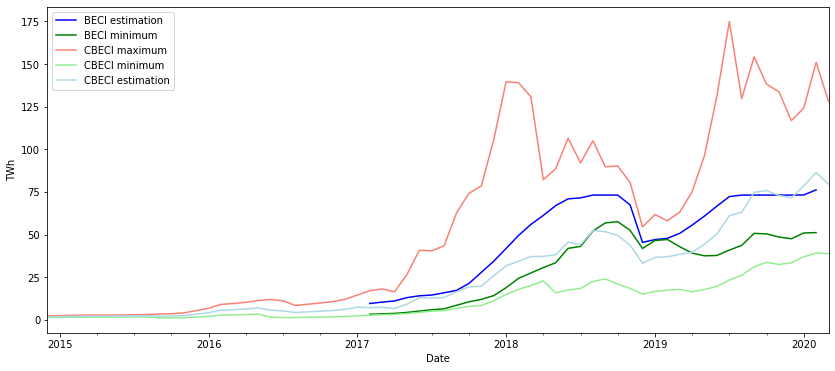

In [4]:
ax = BECI_avg.plot(figsize=(14,6), color=['blue', 'green'])
CBECI_avg.plot(ax=ax, color=['salmon','lightgreen','lightblue'])
plt.ylabel('TWh')
plt.show()